### [RQ3] *Which teams have the youngest coaches?*  Rank all the teams by the age of their coach and show the 10 teams with the youngest coaches. Remember that during a season a team could have more coaches, in that case pick the younger of them. Additionally, show the distirbutions of the ages of all coaches in Premier League, using a boxplot. (Hint: There's an attribute *birthDate*).


In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
matches_england = pd.read_json("C:\\Users\\gabri\\Dropbox\\Magistrale Data Science Roma\\Algorithmic methods of data mining\\Homeworks\\Homework 2\\Data\\matches\\matches_England.json")
coaches = pd.read_json("C:\\Users\\gabri\\Dropbox\\Magistrale Data Science Roma\\Algorithmic methods of data mining\\Homeworks\\Homework 2\\Data\\coaches.json")
teams = pd.read_json("C:\\Users\\gabri\\Dropbox\\Magistrale Data Science Roma\\Algorithmic methods of data mining\\Homeworks\\Homework 2\\Data\\teams.json")

In [3]:
coaches.drop_duplicates(subset='lastName', keep='first', inplace=True) # In the coaches dataset there is a wrong Id for the coach Antonio Conte, I'm deleting the repetitive row

In [4]:
matches_england.head() # just to see which kind of data are inside

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [5]:
teamsData = matches_england['teamsData'] # New series with teamsData from matches_england's dataframe
coaches_m = [] #I looked for all the coaches and all the teams to get also the old coach for each particular team
teams_m = []
for i in range(len(teamsData)): #I'm going inside the Series to get all the singular data
    for k, v in teamsData[i].items():
        for z,y in v.items():
            if z=='coachId':
                coaches_m.append(y)
            if z=='teamId':
                teams_m.append(y)

In [6]:
set_coaches_teams = set(list(zip(coaches_m, teams_m))) # in that way I'm deleting the repetitive couple

In [7]:
df_set_coaches_teams = pd.DataFrame(set_coaches_teams, columns = ['coaches', 'teams']) # New dataframe with all coaches and teams
df_set_coaches_teams.head()

,coaches,teams
0,0,1633
1,272869,1610
2,14791,1612
3,267136,1625
4,0,1651


In [8]:
coaches_teams_name = pd.merge(df_set_coaches_teams, teams, left_on ="teams", right_on = "wyId") # I'm associating the team's name with the Id 
coaches_teams_name1 = coaches_teams_name[['coaches','teams','area','officialName','type']] 
short_n_coach = coaches[['birthDate','shortName','wyId']] # to get only the column that I need
coaches_teams_name2 = pd.merge(coaches_teams_name1, short_n_coach, left_on ="coaches", right_on = "wyId") # I'm associating the coach's name with the Id
final_coach_team = coaches_teams_name2[['area','teams','officialName','shortName','coaches','birthDate']] 
# with the last line I got all data that I'm interested
final_coach_team.head()

,area,teams,officialName,shortName,coaches,birthDate
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",1633,West Ham United FC,S. Bilić,269869,1968-09-11
1,"{'name': 'England', 'id': '0', 'alpha3code': '...",1633,West Ham United FC,D. Moyes,8235,1963-04-25
2,"{'name': 'England', 'id': '0', 'alpha3code': '...",1610,Chelsea FC,A. Conte,20454,1969-07-31
3,"{'name': 'England', 'id': '0', 'alpha3code': '...",1612,Liverpool FC,J. Klopp,14791,1967-06-16
4,"{'name': 'England', 'id': '0', 'alpha3code': '...",1625,Manchester City FC,Guardiola,267136,1971-01-18


In [9]:
pd.set_option('mode.chained_assignment', None)
final_coach_team['age'] = [2019-int(final_coach_team['birthDate'][i][0:4]) for i in range(final_coach_team.shape[0])] # adding column age for each coach
final_coach_team.reset_index(drop=True,inplace=True) # getting a new index for the data
final_coach_team.head()

,area,teams,officialName,shortName,coaches,birthDate,age
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",1633,West Ham United FC,S. Bilić,269869,1968-09-11,51
1,"{'name': 'England', 'id': '0', 'alpha3code': '...",1633,West Ham United FC,D. Moyes,8235,1963-04-25,56
2,"{'name': 'England', 'id': '0', 'alpha3code': '...",1610,Chelsea FC,A. Conte,20454,1969-07-31,50
3,"{'name': 'England', 'id': '0', 'alpha3code': '...",1612,Liverpool FC,J. Klopp,14791,1967-06-16,52
4,"{'name': 'England', 'id': '0', 'alpha3code': '...",1625,Manchester City FC,Guardiola,267136,1971-01-18,48


In [10]:
final_coach_team1 = final_coach_team.sort_values(by='birthDate') #I'm taking the sorted values to take the first 10 coaches by age

In [11]:
youngest_10_coachesPL = final_coach_team1.drop_duplicates(subset='officialName', keep='last').tail(10) # I'm deleting all the repetitive teams saving only the teams with the youngest coach
youngest_10_coachesPL.head()

,area,teams,officialName,shortName,coaches,birthDate,age
10,"{'name': 'England', 'id': '0', 'alpha3code': '...",1646,Burnley FC,S. Dyche,8880,1971-06-28,48
22,"{'name': 'England', 'id': '0', 'alpha3code': '...",1619,Southampton FC,M. Pellegrino,254174,1971-10-05,48
11,"{'name': 'England', 'id': '0', 'alpha3code': '...",1673,Huddersfield Town FC,D. Wagner,18572,1971-10-19,48
27,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",10531,Swansea City AFC,P. Clement,381291,1972-01-08,47
9,"{'name': 'England', 'id': '0', 'alpha3code': '...",1624,Tottenham Hotspur FC,M. Pochettino,292863,1972-03-02,47


In [12]:
final_teams_age = youngest_10_coachesPL[['officialName','shortName','age']][::-1] # just to show in order for the youngest
final_teams_age.head()

,officialName,shortName,age
21,AFC Bournemouth,E. Howe,42
24,Watford FC,Marco Silva,42
20,Leicester City FC,M. Appleton,44
7,Everton FC,D. Unsworth,46
25,Newcastle United FC,Paco,46


In [13]:
all_coaches_age = final_coach_team.drop_duplicates(subset='shortName', keep='last') 
# There is one coach that during that season has had 2 England's teams. I'm deleting one of them to get all the coaches without repetition 

In [14]:
final_teams_age.reset_index(drop=True,inplace=True) # getting a new index for the final data


### Show the 10 teams with the youngest coaches.


In [15]:
final_teams_age

,officialName,shortName,age
0,AFC Bournemouth,E. Howe,42
1,Watford FC,Marco Silva,42
2,Leicester City FC,M. Appleton,44
3,Everton FC,D. Unsworth,46
4,Newcastle United FC,Paco,46
5,Tottenham Hotspur FC,M. Pochettino,47
6,Swansea City AFC,P. Clement,47
7,Huddersfield Town FC,D. Wagner,48
8,Southampton FC,M. Pellegrino,48
9,Burnley FC,S. Dyche,48


### Show the distirbutions of the ages of all coaches in Premier League, using a boxplot.


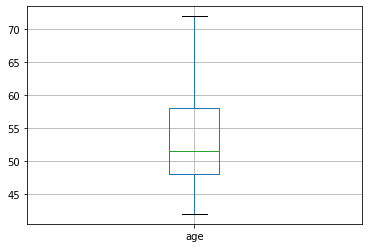

In [17]:
all_coaches_age.boxplot(column='age')